In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

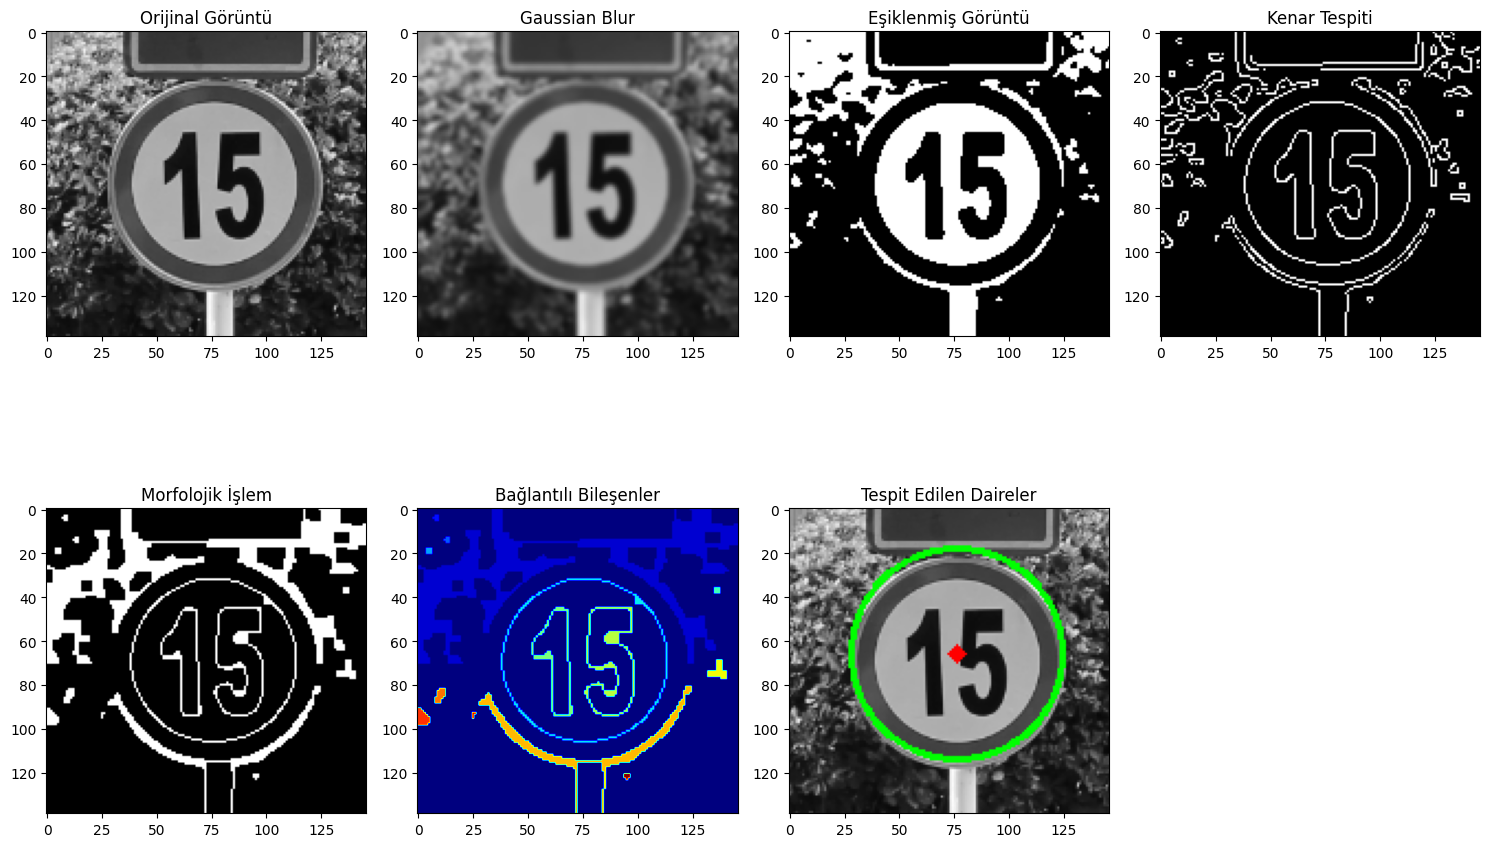

In [18]:


images_dir = 'images_gray'
test_images_dir = 'test'
train_images_dir = 'train'

# 1. Görüntüyü Yükle ve Gri Tonlamaya Çevir
gray_image =  cv2.imread(os.path.join(images_dir, train_images_dir,'train_easy_1.png'))

# 2. Gaussian Blur ile Gürültüyü Azalt
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# 3. Eşikleme ile İkili Görüntü Oluştur
_, thresholded_image = cv2.threshold(blurred_image, 120, 255, cv2.THRESH_BINARY)

# 4. Kenar Tespiti (Canny Edge Detection)
edges = cv2.Canny(thresholded_image, 100, 200)

# 5. Morfolojik Operatörler: Genişletme ve Aşındırma
kernel = np.ones((5, 5), np.uint8)
dilated_image = cv2.dilate(edges, kernel, iterations=1)
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

# 6. Bağlantılı Bileşen Analizi
num_labels, labels_im = cv2.connectedComponents(eroded_image)

# 7. Daire Tespiti (Hough Transform)
circles = cv2.HoughCircles(
    eroded_image, 
    cv2.HOUGH_GRADIENT, 
    dp=1, 
    minDist=30, 
    param1=50, 
    param2=30, 
    minRadius=10, 
    maxRadius=100
)

# Daireleri Görselleştir
output_image = gray_image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        # Daire çiz
        cv2.circle(output_image, (circle[0], circle[1]), circle[2], (0, 255, 0), 2)
        # Merkez işaretle
        cv2.circle(output_image, (circle[0], circle[1]), 2, (0, 0, 255), 3)

# Görüntüleri Görselleştir
plt.figure(figsize=(15, 10))

plt.subplot(2, 4, 1), plt.title("Orijinal Görüntü"), plt.imshow(gray_image, cmap='gray')
plt.subplot(2, 4, 2), plt.title("Gaussian Blur"), plt.imshow(blurred_image, cmap='gray')
plt.subplot(2, 4, 3), plt.title("Eşiklenmiş Görüntü"), plt.imshow(thresholded_image, cmap='gray')
plt.subplot(2, 4, 4), plt.title("Kenar Tespiti"), plt.imshow(edges, cmap='gray')
plt.subplot(2, 4, 5), plt.title("Morfolojik İşlem"), plt.imshow(eroded_image, cmap='gray')
plt.subplot(2, 4, 6), plt.title("Bağlantılı Bileşenler"), plt.imshow(labels_im, cmap='jet')
plt.subplot(2, 4, 7), plt.title("Tespit Edilen Daireler"), plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()


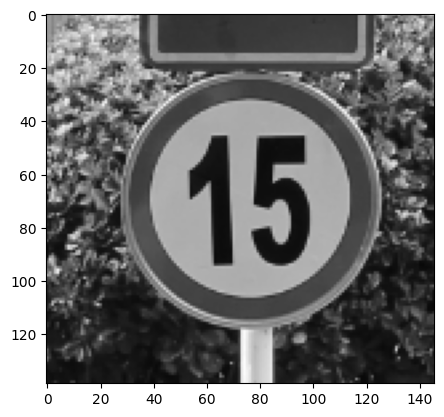

In [19]:
plt.imshow(gray_image)

In [20]:
print(os.path.join(images_dir, train_images_dir,'train_easy_1.png'))

images_gray/train/train_easy_1.png


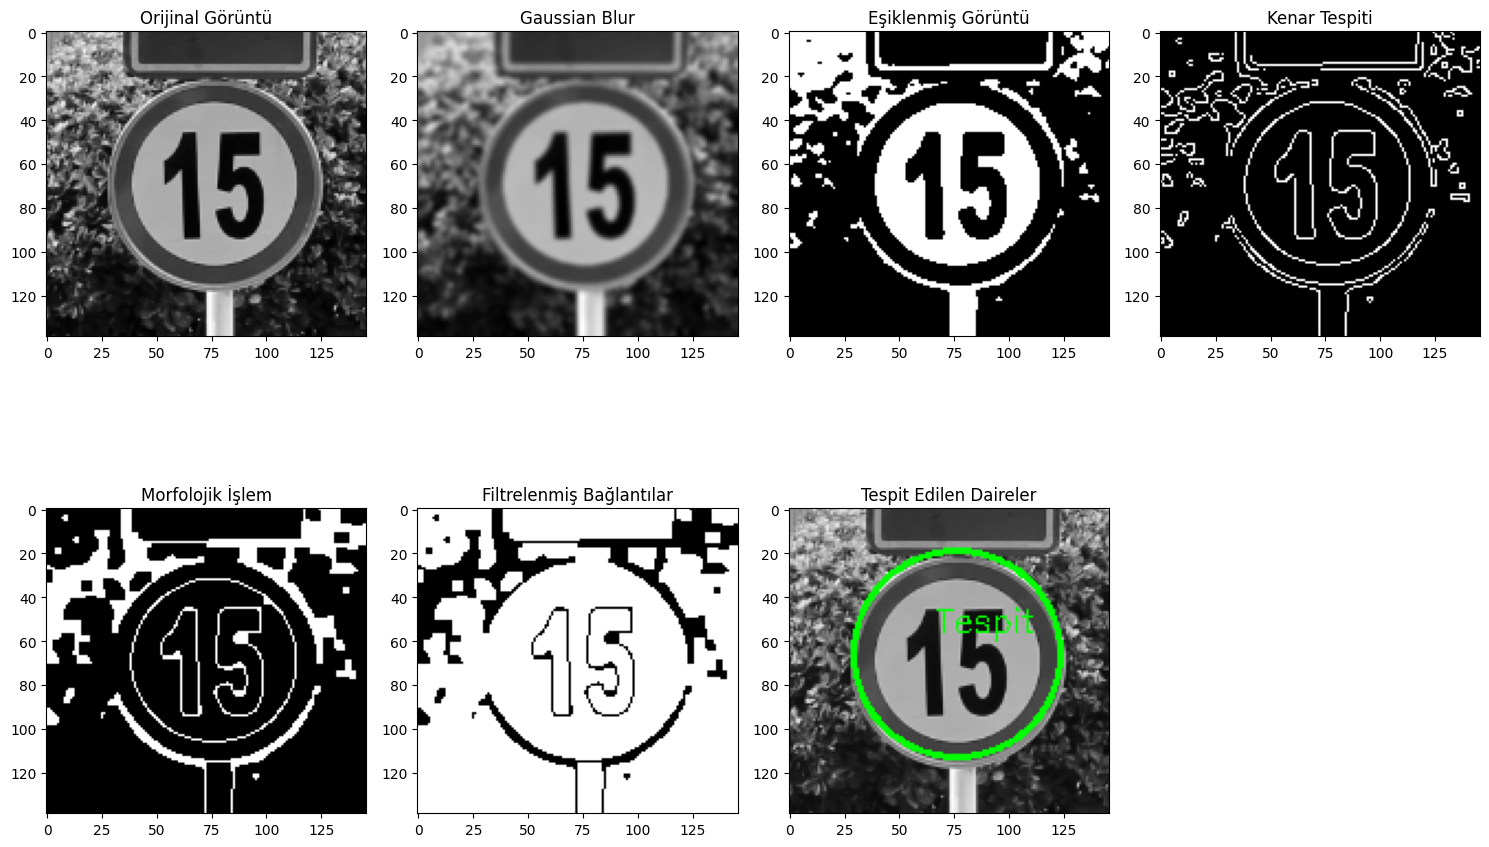

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Klasör ayarları
images_dir = 'images_gray'
train_images_dir = 'train'

# 1. Görüntüyü Yükle ve Gri Tonlamaya Çevir
gray_image = cv2.imread(os.path.join(images_dir, train_images_dir, 'train_easy_1.png'), cv2.IMREAD_GRAYSCALE)

# 2. Gaussian Blur ile Gürültüyü Azalt
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# 3. Eşikleme ile İkili Görüntü Oluştur
_, thresholded_image = cv2.threshold(blurred_image, 120, 255, cv2.THRESH_BINARY)

# 4. Kenar Tespiti (Canny Edge Detection)
edges = cv2.Canny(thresholded_image, 100, 200)

# 5. Morfolojik Operatörler: Genişletme ve Aşındırma
kernel = np.ones((5, 5), np.uint8)
dilated_image = cv2.dilate(edges, kernel, iterations=1)
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

# 6. Bağlantılı Bileşen Analizi
num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(eroded_image)

# Bağlantılı bileşenleri filtreleme: Yalnızca yeterince büyük ve yuvarlak bileşenler
filtered_labels = []
min_area = 100  # Minimum alan
for label, stat in enumerate(stats):
    if stat[cv2.CC_STAT_AREA] > min_area:
        aspect_ratio = stat[cv2.CC_STAT_WIDTH] / stat[cv2.CC_STAT_HEIGHT]
        if 0.8 < aspect_ratio < 1.2:  # Neredeyse kare/daire biçimli
            filtered_labels.append(label)

# Filtrelenmiş bağlantılı bileşenleri görselleştirme
filtered_components = np.zeros_like(eroded_image)
for label in filtered_labels:
    filtered_components[labels_im == label] = 255

# 7. Daire Tespiti (Hough Transform)
circles = cv2.HoughCircles(
    filtered_components, 
    cv2.HOUGH_GRADIENT, 
    dp=1, 
    minDist=30, 
    param1=50, 
    param2=30, 
    minRadius=10, 
    maxRadius=100
)

# Sadece plaka bölgelerine çizim yap
output_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        # Plaka üzerindeki daireyi çiz
        cv2.circle(output_image, (circle[0], circle[1]), circle[2], (0, 255, 0), 2)
        cv2.putText(output_image, "Tespit", (circle[0] - 10, circle[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Görüntüleri Görselleştir
plt.figure(figsize=(15, 10))

plt.subplot(2, 4, 1), plt.title("Orijinal Görüntü"), plt.imshow(gray_image, cmap='gray')
plt.subplot(2, 4, 2), plt.title("Gaussian Blur"), plt.imshow(blurred_image, cmap='gray')
plt.subplot(2, 4, 3), plt.title("Eşiklenmiş Görüntü"), plt.imshow(thresholded_image, cmap='gray')
plt.subplot(2, 4, 4), plt.title("Kenar Tespiti"), plt.imshow(edges, cmap='gray')
plt.subplot(2, 4, 5), plt.title("Morfolojik İşlem"), plt.imshow(eroded_image, cmap='gray')
plt.subplot(2, 4, 6), plt.title("Filtrelenmiş Bağlantılar"), plt.imshow(filtered_components, cmap='gray')
plt.subplot(2, 4, 7), plt.title("Tespit Edilen Daireler"), plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()


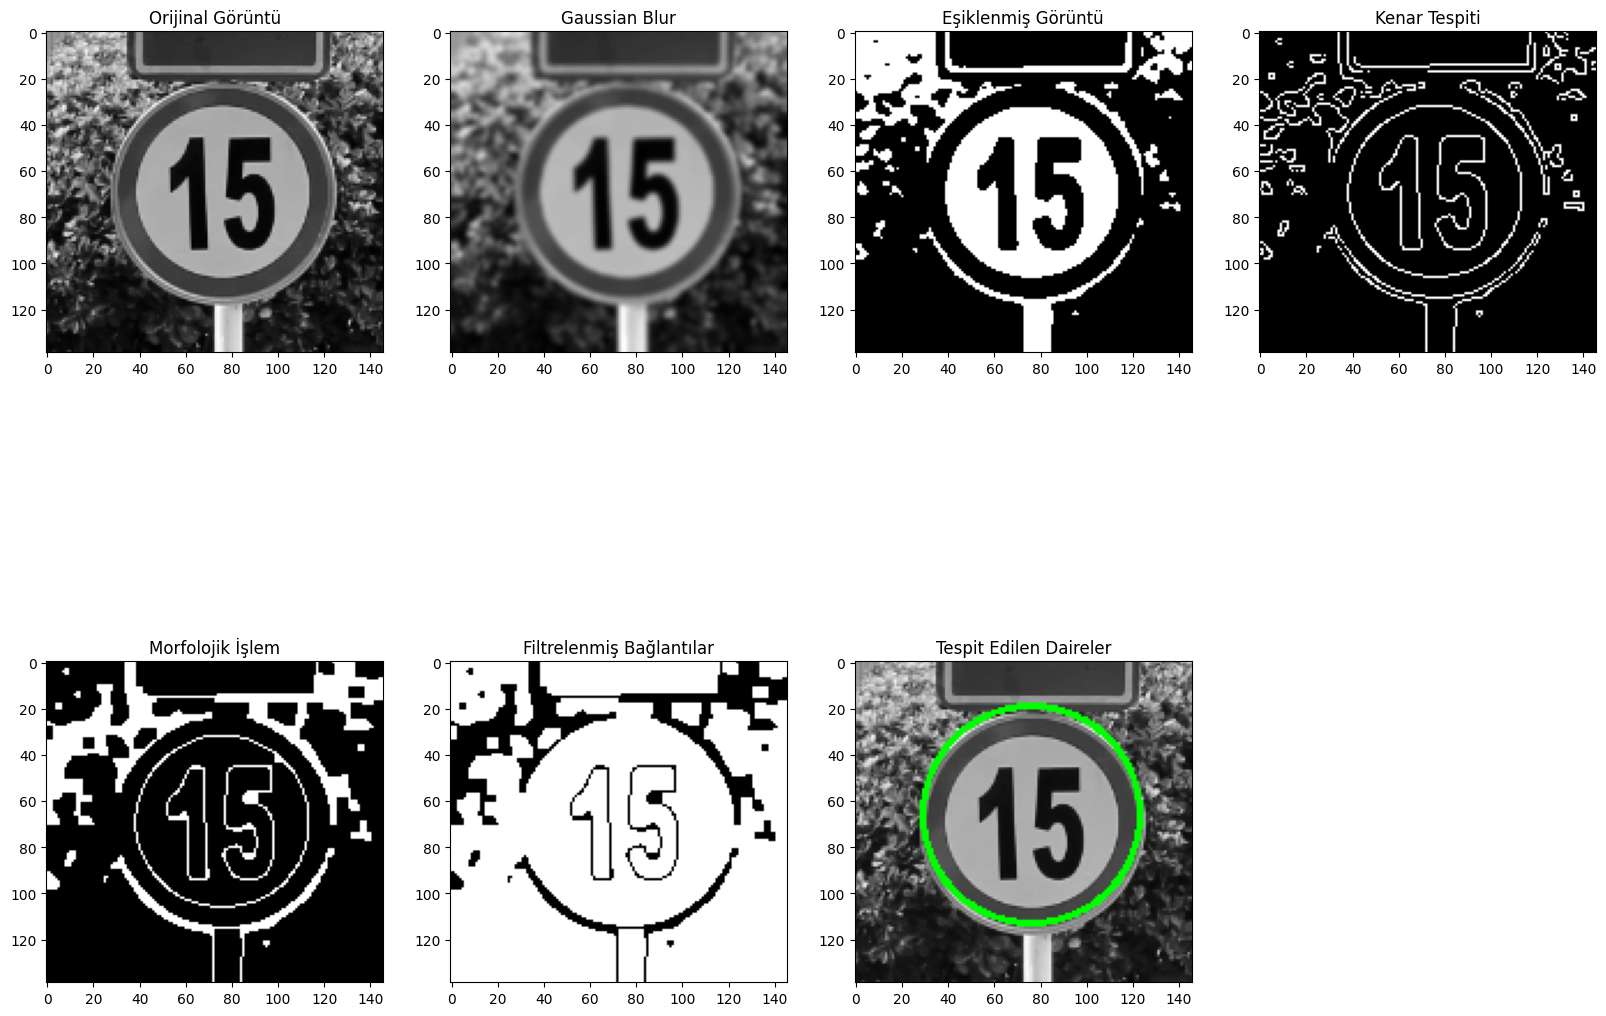

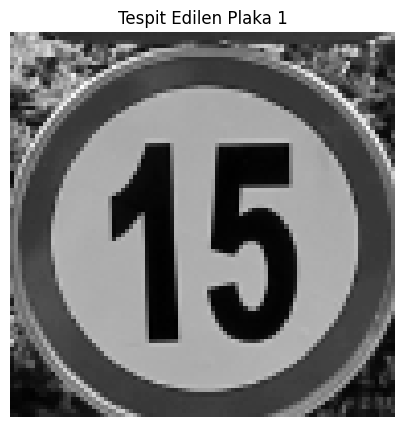

<Figure size 640x480 with 0 Axes>

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Klasör ayarları
images_dir = 'images_gray'
train_images_dir = 'train'

# 1. Görüntüyü Yükle ve Gri Tonlamaya Çevir
gray_image = cv2.imread(os.path.join(images_dir, train_images_dir, 'train_easy_1.png'), cv2.IMREAD_GRAYSCALE)

# 2. Gaussian Blur ile Gürültüyü Azalt
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# 3. Eşikleme ile İkili Görüntü Oluştur
_, thresholded_image = cv2.threshold(blurred_image, 120, 255, cv2.THRESH_BINARY)

# 4. Kenar Tespiti (Canny Edge Detection)
edges = cv2.Canny(thresholded_image, 100, 200)

# 5. Morfolojik Operatörler: Genişletme ve Aşındırma
kernel = np.ones((5, 5), np.uint8)
dilated_image = cv2.dilate(edges, kernel, iterations=1)
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

# 6. Bağlantılı Bileşen Analizi
num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(eroded_image)

# Bağlantılı bileşenleri filtreleme: Yalnızca yeterince büyük ve yuvarlak bileşenler
filtered_labels = []
min_area = 100  # Minimum alan
for label, stat in enumerate(stats):
    if stat[cv2.CC_STAT_AREA] > min_area:
        aspect_ratio = stat[cv2.CC_STAT_WIDTH] / stat[cv2.CC_STAT_HEIGHT]
        if 0.8 < aspect_ratio < 1.2:  # Neredeyse kare/daire biçimli
            filtered_labels.append(label)

# Filtrelenmiş bağlantılı bileşenleri görselleştirme
filtered_components = np.zeros_like(eroded_image)
for label in filtered_labels:
    filtered_components[labels_im == label] = 255

# 7. Daire Tespiti (Hough Transform)
circles = cv2.HoughCircles(
    filtered_components, 
    cv2.HOUGH_GRADIENT, 
    dp=1, 
    minDist=30, 
    param1=50, 
    param2=30, 
    minRadius=10, 
    maxRadius=100
)

# Tespit edilen daireleri işaretleme
output_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)  # Renkli kopya oluştur
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        x, y, r = circle
        cv2.circle(output_image, (x, y), r, (0, 255, 0), 2)

# Görüntüleri Görselleştir
plt.figure(figsize=(20, 15))
plt.subplot(2, 4, 1), plt.title("Orijinal Görüntü"), plt.imshow(gray_image, cmap='gray')
plt.subplot(2, 4, 2), plt.title("Gaussian Blur"), plt.imshow(blurred_image, cmap='gray')
plt.subplot(2, 4, 3), plt.title("Eşiklenmiş Görüntü"), plt.imshow(thresholded_image, cmap='gray')
plt.subplot(2, 4, 4), plt.title("Kenar Tespiti"), plt.imshow(edges, cmap='gray')
plt.subplot(2, 4, 5), plt.title("Morfolojik İşlem"), plt.imshow(eroded_image, cmap='gray')
plt.subplot(2, 4, 6), plt.title("Filtrelenmiş Bağlantılar"), plt.imshow(filtered_components, cmap='gray')
plt.subplot(2, 4, 7), plt.title("Tespit Edilen Daireler"), plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))

# Yalnızca plaka bölgelerini çıkart
if circles is not None:
    for i, circle in enumerate(circles[0, :]):
        x, y, r = circle
        cropped_plate = gray_image[y - r:y + r, x - r:x + r]
        
        # Plaka için ayrı görselleştirme
        plt.figure(figsize=(5, 5))
        plt.title(f"Tespit Edilen Plaka {i+1}")
        plt.imshow(cropped_plate, cmap='gray')
        plt.axis('off')
        plt.show()

plt.tight_layout()
plt.show()


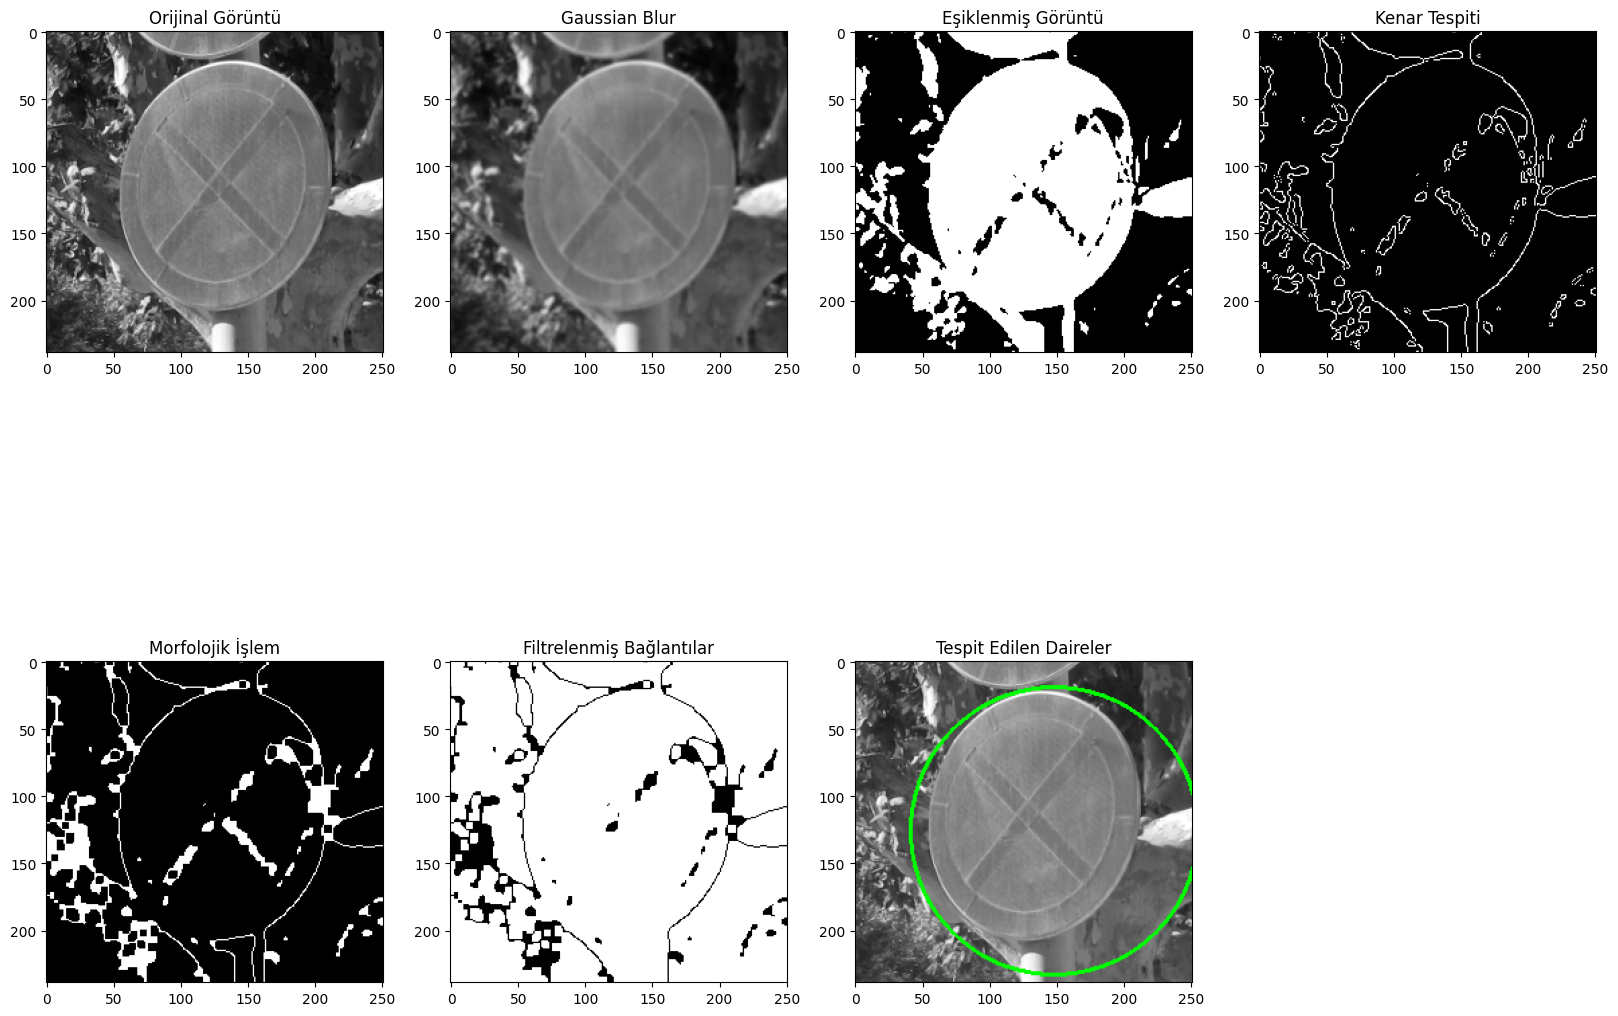

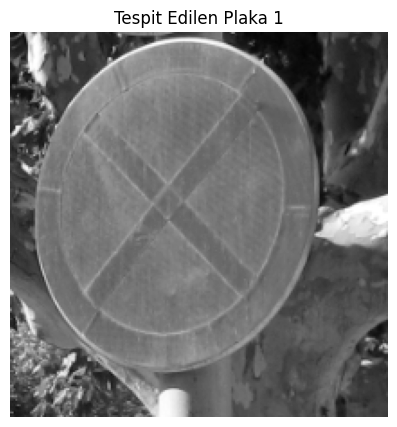

<Figure size 640x480 with 0 Axes>

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Klasör ayarları
images_dir = 'images_gray'
train_images_dir = 'train'

# 1. Görüntüyü Yükle ve Gri Tonlamaya Çevir
gray_image = cv2.imread(os.path.join(images_dir, train_images_dir, 'train_easy_2.png'), cv2.IMREAD_GRAYSCALE)

# 2. Gaussian Blur ile Gürültüyü Azalt
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# 3. Eşikleme ile İkili Görüntü Oluştur
_, thresholded_image = cv2.threshold(blurred_image, 120, 255, cv2.THRESH_BINARY)

# 4. Kenar Tespiti (Canny Edge Detection)
edges = cv2.Canny(thresholded_image, 100, 200)

# 5. Morfolojik Operatörler: Genişletme ve Aşındırma
kernel = np.ones((5, 5), np.uint8)
dilated_image = cv2.dilate(edges, kernel, iterations=1)
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

# 6. Bağlantılı Bileşen Analizi
num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(eroded_image)

# Bağlantılı bileşenleri filtreleme: Yalnızca yeterince büyük ve yuvarlak bileşenler
filtered_labels = []
min_area = 100  # Minimum alan
for label, stat in enumerate(stats):
    if stat[cv2.CC_STAT_AREA] > min_area:
        aspect_ratio = stat[cv2.CC_STAT_WIDTH] / stat[cv2.CC_STAT_HEIGHT]
        if 0.8 < aspect_ratio < 1.2:  # Neredeyse kare/daire biçimli
            filtered_labels.append(label)

# Filtrelenmiş bağlantılı bileşenleri görselleştirme
filtered_components = np.zeros_like(eroded_image)
for label in filtered_labels:
    filtered_components[labels_im == label] = 255

# 7. Daire Tespiti (Hough Transform)
circles = cv2.HoughCircles(
    filtered_components, 
    cv2.HOUGH_GRADIENT, 
    dp=1, 
    minDist=30, 
    param1=50, 
    param2=30, 
    minRadius=10, 
    maxRadius=200
)

# Tespit edilen daireleri işaretleme
output_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)  # Renkli kopya oluştur
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        x, y, r = circle
        cv2.circle(output_image, (x, y), r, (0, 255, 0), 2)

# Görüntüleri Görselleştir
plt.figure(figsize=(20, 15))
plt.subplot(2, 4, 1), plt.title("Orijinal Görüntü"), plt.imshow(gray_image, cmap='gray')
plt.subplot(2, 4, 2), plt.title("Gaussian Blur"), plt.imshow(blurred_image, cmap='gray')
plt.subplot(2, 4, 3), plt.title("Eşiklenmiş Görüntü"), plt.imshow(thresholded_image, cmap='gray')
plt.subplot(2, 4, 4), plt.title("Kenar Tespiti"), plt.imshow(edges, cmap='gray')
plt.subplot(2, 4, 5), plt.title("Morfolojik İşlem"), plt.imshow(eroded_image, cmap='gray')
plt.subplot(2, 4, 6), plt.title("Filtrelenmiş Bağlantılar"), plt.imshow(filtered_components, cmap='gray')
plt.subplot(2, 4, 7), plt.title("Tespit Edilen Daireler"), plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))

# Yalnızca plaka bölgelerini çıkart
if circles is not None:
    for i, circle in enumerate(circles[0, :]):
        x, y, r = circle
        cropped_plate = gray_image[y - r:y + r, x - r:x + r]
        
        # Plaka için ayrı görselleştirme
        plt.figure(figsize=(5, 5))
        plt.title(f"Tespit Edilen Plaka {i+1}")
        plt.imshow(cropped_plate, cmap='gray')
        plt.axis('off')
        plt.show()
else:
    print("Daire tespit edilemedi.")

plt.tight_layout()
plt.show()
